In [1]:
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
import math
import matplotlib.pyplot as pl
import random

To plot coherence l1 norm (l1), relative entropy(S) and success probability(P) as a funciton of number of iteration(noi) taking the Grover's operator as G = DO

O = ( I-2|ψ⟩⟨ψ| ) and D = ( 2|ψ1⟩⟨ψ1|-I )

l1 norm of coherence is given by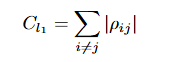

relative entropy is given by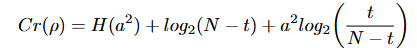 with 

   ;   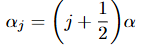   ;   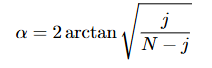   ;   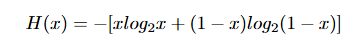   
Success probability is determined by the formula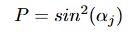
with t = number of target states and j = iteration number

In [18]:
n = 10     #no. of qubits
N = 2**n   #dimension of matrix
t = 5      #no. of target states
length = list(range(n))
noi = 15   #taking same number of iteration for all cases
noi_opt = math.floor(math.sqrt(N/t) * np.pi / 4)   #optimal No of iterations
print("noi = ", noi)
print("Optimal noi = ",noi_opt)

#to set target states by randomly generating them
target = np.zeros(t)    #to store target states
count = 0
flag = 0
i = 0
while(True):
    #to generate a random integer for target position
    a = random.randint(0,N-1)
    
    #checking if that number has already been chosen previously as target state
    for j in range(count):
        if(target[j] == a):
            flag = 1  #value is present in the target array
            
    #to store new value in target array
    if(flag == 0):
        #to store in count position of target array
        target[count] = a
        #updating count (position) value
        count += 1
        #checking for further iteration of while loop
        if(count == t):
            break
print("target = ",target)

phi = [np.pi]    #setting at a particular value
print("phi = ",phi)

x = [complex(np.cos(a), np.sin(a)) for a in phi]
print("x = ",x)

#array to store coherence values after each suboperation in every grover's iteration
l1 = np.zeros(noi)    #to store l1 norm of coherence values after each iteration
S  = np.zeros(noi)    #to store relative entropy values after each iteration
P  = np.zeros(noi)    #to store success probability after each iteration
x_axis = list(range(noi))    #to store iteration number

noi =  15
Optimal noi =  11
target =  [826.  49. 123. 654. 245.]
phi =  [3.141592653589793]
x =  [(-1+1.2246467991473532e-16j)]


In [19]:
def iteration(i,a):
    qc.barrier()
    #count = i*2
    copy_i = i    #storing copy of iteration number
    copy_a = a    #storing copy of phi value
    
    #applying O operator
    qc.append(O_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied O operator to |ψ2⟩", state.draw('latex'))
    
    #Applying D operator
    qc.append(D_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied D operator to |ψ2⟩", state.draw('latex'))
    density_operator = state.to_operator()
    
    #calculating coherence by l1 norm
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ2⟩ = ",coherence)
    l1[copy_i] = coherence
    print("l1 norm = ",coherence)
    
    #calculating coherence by relative entropy
    j = copy_i+1   #to store the actual iteration number 
    alpha = 2*np.arctan(np.sqrt(t/(N-t)))
    alpha_j = (j+1/2.0)*alpha    
    a = np.sin(alpha_j)
    a_2 = a**2
    H = -(a_2*math.log2(a_2)+(1-a_2)*math.log2(1-a_2))
    Cr = H+math.log2(N-j)+a_2*math.log2(j/(N-j))
    S[copy_i] = Cr
    print("relative entropy = ",Cr)
    
    #calculating success probability
    P[copy_i] = np.sin(alpha_j)**2
    
for a in range(len(phi)):
    print("======================================== FOR ϕ = ", phi[a]*180/np.pi,"========================================")
    qc = QuantumCircuit(n)
    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("initialised |ψ0⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ0⟩ = ",coherence)

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ1⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ1⟩ = ",coherence)

    #defining generalised O Operator
    count = 0
    choice = a
    O_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i != j):   #off diagonal elements
                O_operator.data[i][j] = 0
            else:    #diagonal elements
                flag = 0
                for k in range(t):
                    if(i == target[k]):
                        O_operator.data[i][j] = x[choice]
                        count += 1
                        flag = 1
                        break
                if(flag == 0):
                    O_operator.data[i][j] = 1            
   
    #defining D operator
    D_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i == j):    #for diagonal elements
                D_operator.data[i][j] = 2*density_operator.data[i][j]-1
            else:          #for off-diagonal elements
                D_operator.data[i][j] = 2*density_operator.data[i][j]
    
    #sending out for x iterations of grover's operator
    for i in range(noi):
        print("--------",(i+1)," ITERATION--------")
        iteration(i,a)    #a takes angle phi and i takes noi

======================================== FOR ϕ =  180.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1023.0000000000001
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  1003.09765625
l1 norm =  1003.09765625
relative entropy =  9.822459731638768
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  944.9379034638406
l1 norm =  944.9379034638406
relative entropy =  9.462953642940015
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  853.0422861320836
l1 norm =  853.0422861320836
relative entropy =  8.89827080043237
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  734.5550939898469
l1 norm =  734.5550939898469
relative entropy =  8.155021457268019
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  598.6879396236474
l1 norm =  598.6879396236474
relative entropy =  7.2803407176448385
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  456.0036152803672
l1 norm =  456.0036152803672
relative entropy =  6.337310155325019
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  317.5949040209534
l1 norm =  317.5949040209534
relative entropy =  5.400550056829393
-------- 8  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  194.22218769509888
l1 norm =  194.22218769509888
relative entropy =  4.552125940383964
-------- 9  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  95.47689681707203
l1 norm =  95.47689681707203
relative entropy =  3.8788413400300445
-------- 10  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  29.035838892015608
l1 norm =  29.035838892015608
relative entropy =  3.4747250080745804
-------- 11  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  10.814852863437427
l1 norm =  10.814852863437427
relative entropy =  3.4841731367652677
-------- 12  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  60.451488541828034
l1 norm =  60.451488541828034
relative entropy =  3.9849149845219864
-------- 13  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  145.1153560614928
l1 norm =  145.1153560614928
relative entropy =  4.773106303472716
-------- 14  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  258.22438747816955
l1 norm =  258.22438747816955
relative entropy =  5.72237525473899
-------- 15  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  390.98508736508006
l1 norm =  390.98508736508006
relative entropy =  6.7268448424374485


l1 =  [0.9795875549316406, 0.9227909213514068, 0.8330491075508629, 0.7173389589744599, 0.5846561910387181, 0.4453160305472336, 0.3101512734579623, 0.189670105170995, 0.0932391570479219, 0.028355311417983992, 0.010561379749450612, 0.05903465677912894, 0.14171421490380157, 0.25217225339664995, 0.381821374379961]
S_N =  [0.009592245831678484, 0.009241165666933608, 0.008689717578547236, 0.0079638881418633, 0.007109707732075038, 0.006188779448559589, 0.005273974664872454, 0.004445435488656215, 0.0037879309961230904, 0.0033932861406978324, 0.0034025128288723318, 0.0038915185395722524, 0.004661236624485074, 0.005588257084706045, 0.006569184416442821]
P =  [0.04337497 0.11736677 0.22110583 0.3465271  0.4838799  0.62248594
 0.75156948 0.86109513 0.94254796 0.98959555 0.99858026 0.96880358
 0.90258045 0.8050593  0.68382176]


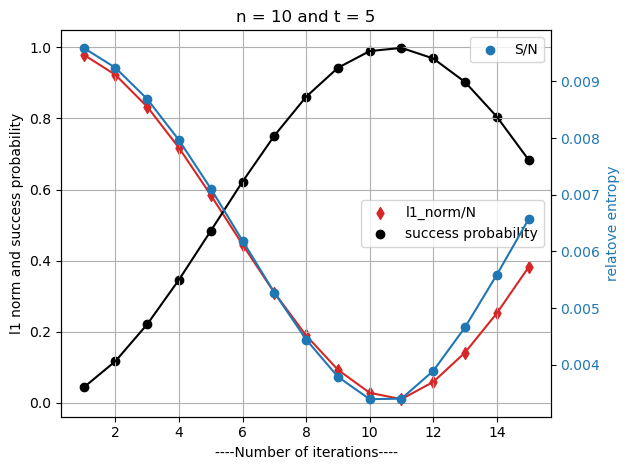

In [20]:
l1_N = [a/N for a in l1]
S_N  = [a/N for a in S]
xa   = [a+1 for a in x_axis]

print("l1 = ",l1_N)
print("S_N = ",S_N)
print("P = ",P)

fig, ax1 = pl.subplots()
pl.title("n = {} and t = {}".format(n, t))
color1 = 'tab:red'
color2 = 'black'
ax1.set_xlabel('----Number of iterations----')
ax1.scatter(xa, l1_N, marker='d', color=color1, label='l1_norm/N')
ax1.plot(xa, l1_N, color=color1)
ax1.scatter(xa, P, color=color2, label='success probability')
ax1.plot(xa, P, color=color2)
pl.legend()
ax1.set_ylabel("l1 norm and success probability")
pl.grid(True)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.scatter(xa, S_N, color=color, label='S/N')
ax2.plot(xa, S_N, color=color)
pl.legend()
ax2.set_ylabel('relatove entropy', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
#pl.grid(True)
pl.show()